In [1]:
import pandas as pd
import os

from settings import base_path
import sys
sys.path.append(r"C:\Users\ehbaker\Documents\Python\Modules")
import CleanWxData as wx

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
%matplotlib notebook

sys.path.append(r"C:\Users\ehbaker\Documents\Python\Modules")


In [2]:
save_dir=r'C:/Users/ehbaker/Documents/Summer20192/'

In [3]:
#Define Seasons
summer_months=[6,7,8]
winter_months=[12,1,2]
spring_months=[3,4,5]
fall_months=[9,10,11]
May=[5]
June=[6]
July=[7]
August=[8]
Sept=[9]
season_list=[summer_months, winter_months, spring_months, fall_months]
month_list=[May, June, July, August, Sept]
season_names=['summer', 'winter', 'spring', 'fall']
month_names=['May', 'June', 'July', 'August', 'September']

Glaciers=['Gulkana', 'Wolverine', 'LemonCreek', 'SouthCascade', 'Sperry']


In [5]:
alldat=pd.DataFrame()
    
for Glacier in Glaciers:
    print('top level ' + Glacier)
    #Define 'main' site at each glacier
    if Glacier=='Gulkana':
        Stations=['1480', '1725']
    if Glacier=='Wolverine':
        Stations=['990', '1420']
    if Glacier=='LemonCreek':
        Stations=['1285', '5', 'Camp17AWS']
    if Glacier=='SouthCascade':
        Stations=['270', '1830']
    if Glacier=='Sperry':
        Stations=['1920', '2440']
    print('Stations= ' + str(Stations))
    for Station in Stations:
        print('station '+ Station)

        #Read in data
        data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"

        #fl='Input_' + Glacier + Station+ '_Daily_Weather.csv'
        fl=Glacier.lower()+Station+'_daily_LVL2.csv'
        if Station in ['990', '1480']: #need to have appended historical data (pre-digital)
            data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"
            fl='Input_' + Glacier + Station+ '_Daily_Weather.csv'
            temp_col_L3name='Temperature'
        pth=os.path.join(data_dir, fl)
        dat=pd.read_csv(pth)
        print("read data from "+ pth)

        #Set time index
        dat.Date=pd.to_datetime(dat.Date, infer_datetime_format=True)
        dat=dat.set_index('Date')

        #Abbreviate precip column name
        dat.rename(columns={'Precip_MeasuredWindSpeed_UndercatchAdj':'precip_adj'}, inplace=True)
        #Add month column
        dat['month']=dat.index.month
        dat['decimal_date']=dat.index.year + (dat.index.dayofyear-1)/365

        #If read in LVL3 data b/c of gage change, rename temperature column
        if Glacier + Station in ['Wolverine990', 'Gulkana1480']:
            dat.rename(columns={temp_col_L3name:'site_temp_USGS'}, inplace=True)
            
        #Store Temperature as the glacier name
        dat.rename(columns={'site_temp_USGS': Glacier+Station}, inplace=True)
        alldat=alldat.merge(dat[[Glacier+Station]], how='outer',left_index=True, right_index=True)

top level Gulkana
Stations= ['1480', '1725']
station 1480


FileNotFoundError: [Errno 2] File b'Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL3/Input_Gulkana1480_Daily_Weather.csv' does not exist: b'Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL3/Input_Gulkana1480_Daily_Weather.csv'

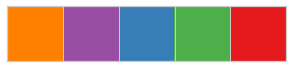

In [4]:
#Construct Color Palette for Glaciers
glacier_pal = ["#ff7f00", "#984ea3", "#377eb8", "#4daf4a", "#e41a1c"]
sns.palplot(sns.color_palette(glacier_pal))

In [5]:
# alldat['2014'].plot(color=glacier_pal)

In [6]:
temp_var='Temperature'
precip_var='Precipitation'

<IPython.core.display.Javascript object>


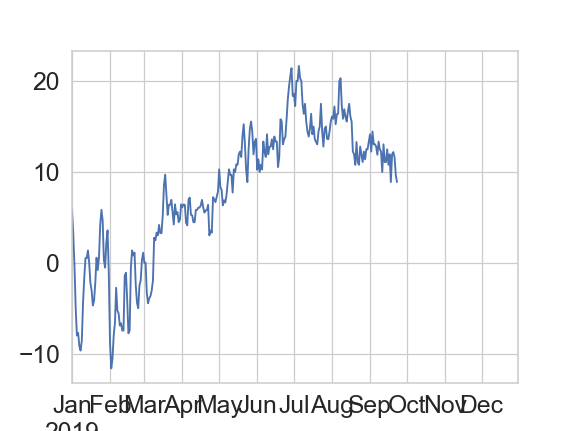

In [8]:
%matplotlib notebook
plt.figure()
alldat.LemonCreek5['2019'].plot()

In [10]:
save_dir+'daily temperature.csv'

'C:/Users/ehbaker/Documents/Summer20192/daily temperature.csv'

In [9]:
yrdat=pd.DataFrame()
for col in alldat.columns:
    yrdat[col]=wx.aggregate_time_with_threshold(alldat[col], 'AS',func='mean', steps_in_period=365, threshold=0.8)

In [10]:
yrdat.to_csv(save_dir+ 'mean annual temperature.csv', float_format='%.1f', date_format='%Y')

In [21]:
yrdat=pd.read_csv(save_dir + 'mean summer temperature.csv')

In [24]:
yrdat[yrdat.Wolverine990.notnull()]

,Date,Gulkana1480,Gulkana1725,Wolverine990,Wolverine1420,LemonCreek1285,LemonCreek5,LemonCreekCamp17AWS,SouthCascade270,SouthCascade1830,Sperry1920,Sperry2440
22,1967,5.6,NaN,6.6,NaN,NaN,9.7,NaN,15.5,NaN,NaN,NaN
23,1968,3.6,NaN,4.6,NaN,NaN,9.9,NaN,14.2,NaN,NaN,NaN
24,1969,3.9,NaN,4.6,NaN,NaN,10.0,NaN,14.8,NaN,NaN,NaN
25,1970,2.0,NaN,2.5,NaN,NaN,8.7,NaN,14.4,NaN,NaN,NaN
26,1971,3.1,NaN,2.3,NaN,NaN,9.7,NaN,14.0,NaN,NaN,NaN
27,1972,1.4,NaN,3.2,NaN,NaN,9.1,NaN,13.6,NaN,NaN,NaN
28,1973,1.4,NaN,3.0,NaN,NaN,9.1,NaN,14.5,NaN,NaN,NaN
29,1974,4.3,NaN,5.3,NaN,NaN,9.5,NaN,14.6,NaN,NaN,NaN
30,1975,2.5,NaN,3.6,NaN,NaN,9.9,NaN,13.2,NaN,NaN,NaN
31,1976,1.2,NaN,3.7,NaN,NaN,10.1,NaN,13.7,NaN,NaN,NaN


In [ ]:
yrdat_melt=pd.melt(yrdat.reset_index(), value_name=temp_var, var_name='Glacier', id_vars='Date')
yrdat_melt.set_index('Date', inplace=True)

In [17]:
yrdat_melt['Year']=yrdat_melt.index

In [18]:
yrdat_melt.Glacier.unique()

array(['index', 'Gulkana1480', 'Gulkana1725', 'Wolverine990',
       'Wolverine1420', 'LemonCreek1285', 'LemonCreek5',
       'LemonCreekCamp17AWS', 'SouthCascade270', 'SouthCascade1830',
       'Sperry1920', 'Sperry2440'], dtype=object)

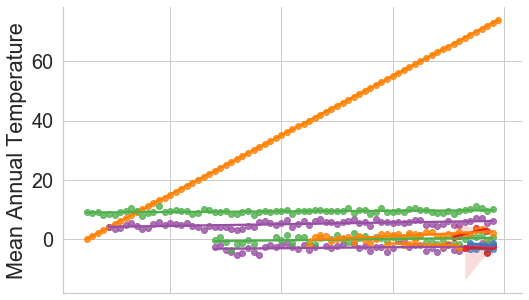

In [19]:
panel_a=sns.lmplot(x="Year", y="Temperature", hue="Glacier", data=yrdat_melt, truncate=True, sharex=True, legend=False,
            palette=sns.color_palette(glacier_pal), aspect=1.5)
#plt.legend(loc='lower left')
plt.ylabel('Mean Annual Temperature')
panel_a.set_xticklabels([])
panel_a.set_axis_labels(x_var='')
#plt.savefig(save_dir + 'MeanAnnualTemperatureBLAHX.jpg')

## Make Plot of Mean Summer Temperature

In [14]:
season=season_list[0]
season_nam=season_names[0]
alldat['month']=alldat.index.month
season_dat=alldat[alldat.month.isin(season)].copy()

In [15]:
season_dat.drop(['month'], axis=1, inplace=True)

In [16]:
yrdat_summer=pd.DataFrame()
for col in season_dat.columns:
    yrdat_summer[col]=wx.aggregate_time_with_threshold(season_dat[col], 'AS',func='mean', steps_in_period=90, threshold=0.8)

In [17]:
yrdat_melt_summer=pd.melt(yrdat_summer.reset_index(), value_name=temp_var, var_name='Glacier', id_vars='Date')
yrdat_melt_summer.set_index('Date', inplace=True)
yrdat_melt_summer['Year']=yrdat_melt_summer.index.year

In [18]:
yrdat_summer.to_csv(save_dir+ 'mean summer temperature.csv', float_format='%.1f', date_format='%Y')

In [19]:
save_dir + 'MeanSummerTemperatureBLAH.jpg'

'C:/Users/ehbaker/Documents/Summer20192/MeanSummerTemperatureBLAH.jpg'

In [59]:
#THIS IS CURRENTLY SUPER HACK-Y
Glacier='LemonCreek'
Station='Camp17AWS'

In [60]:
yrdat_summer.columns

Index(['Gulkana1480', 'Gulkana1725', 'Wolverine990', 'Wolverine1420',
       'LemonCreek1285', 'LemonCreek5', 'LemonCreekCamp17AWS',
       'SouthCascade270', 'SouthCascade1830', 'Sperry1920', 'Sperry2440',
       'rank'],
      dtype='object')

In [61]:
#Check out summer temperatures
from scipy import stats
most_recent_summer_val=yrdat_summer[Glacier+Station][-1]
#.percentile(most_recent_summer_val)
stats.percentileofscore(yrdat_summer[Glacier+Station].dropna().values, most_recent_summer_val)

nan

In [62]:
yrdat_summer['rank']=yrdat_summer[Glacier+Station].rank(ascending=False)

In [63]:
#Ten hottest and coldest days on record
top10hotdat=yrdat_summer[[Glacier+Station, 'rank']].sort_values(by='rank').head(10)
low10colddat=yrdat_summer[[Glacier+Station, 'rank']].sort_values(by='rank').dropna().tail(10)

In [64]:
top10hotdat

,LemonCreekCamp17AWS,rank
Date,,
2016-01-01,5.859000,1.0
2018-01-01,3.404918,2.0
2014-01-01,3.025137,3.0
2017-01-01,2.926776,4.0
1945-01-01,NaN,NaN
1946-01-01,NaN,NaN
1947-01-01,NaN,NaN
1948-01-01,NaN,NaN
1949-01-01,NaN,NaN


In [65]:
climate_normal_mean_temp=yrdat_summer[[Glacier+Station]]['1981':'2010'].mean()
climate_normal_mean_temp

LemonCreekCamp17AWS   NaN
dtype: float64

In [66]:
climate_normal_mean_temp

LemonCreekCamp17AWS   NaN
dtype: float64

In [67]:
58.9667396-55.7708

3.1959395999999956

In [68]:
lastYrTemp=yrdat_summer[Glacier+Station][-1]
lastYrTemp

nan

In [69]:
lastYrTemp-climate_normal_mean_temp

LemonCreekCamp17AWS   NaN
dtype: float64

In [70]:
#plotdata=yrdat_summer[[Glacier+Station]].copy()

In [71]:
#top10hotdat.index

In [72]:
##THIS WORKS!!!
# color='purple'
# sns.set(style="white", palette="muted", color_codes=True)

# # Set up the matplotlib figure
# f, axes = plt.subplots(2, 1, figsize=(7, 7))
# sns.despine(left=True)
# ax=axes[0]
# ax1=axes[1]
# #Ten hottest and coldest days on record
# low10colddat=plotdata[[Glacier+Station]].sort_values(by=Glacier+Station).head(10)
# top10hotdat=plotdata[[Glacier+Station]].sort_values(by=Glacier+Station).dropna().tail(10)

# # Plot a historgram and kernel density estimate
# sns.distplot(plotdata.dropna(), bins=25, color="green", ax=axes[0], rug=True)
# summerVal=plotdata[Glacier+Station][-1]

# axes[0].annotate('2019', xy=(summerVal, 0.01), xytext=(summerVal+0.5, 0.10),
#             arrowprops=dict(facecolor='red', shrink=0.1), color='red')

# #add dashed line for climate normal average temp
# climate_normal_mean_temp=plotdata[Glacier+Station]['1981':'2010'].mean()
# axes[1].axhline(y=climate_normal_mean_temp, ls='--', color='black')

# #plot summer temperature vs time
# sns.regplot(plotdata[Glacier+Station].index.year, plotdata[Glacier+Station], color=color)
# plt.setp(axes[0], yticks=[])
# plt.setp(axes[1], ylabel='Average Summer Temperature ($^\circ$C)')

# #add 10 hottest summers as red dots; kind of hack-y
# axes[1].scatter(list(top10hotdat.index.year), list(top10hotdat[Glacier+Station]), color='red')
# axes[1].scatter(list(low10colddat.index.year), list(low10colddat[Glacier+Station]), color='blue')


In [73]:
#axes[1].scatter(list(top10hotdat.index.year), list(top10hotdat[Glacier+Station]))

In [74]:
import plot_funcs
import imp

imp.reload(plot_funcs)

<module 'plot_funcs' from 'C:\\Users\\ehbaker\\Documents\\Python\\Modules\\plot_funcs.py'>

In [75]:
yrdat_summer.LemonCreek1285.first_valid_index()

Timestamp('1999-01-01 00:00:00', freq='AS-JAN')

<IPython.core.display.Javascript object>


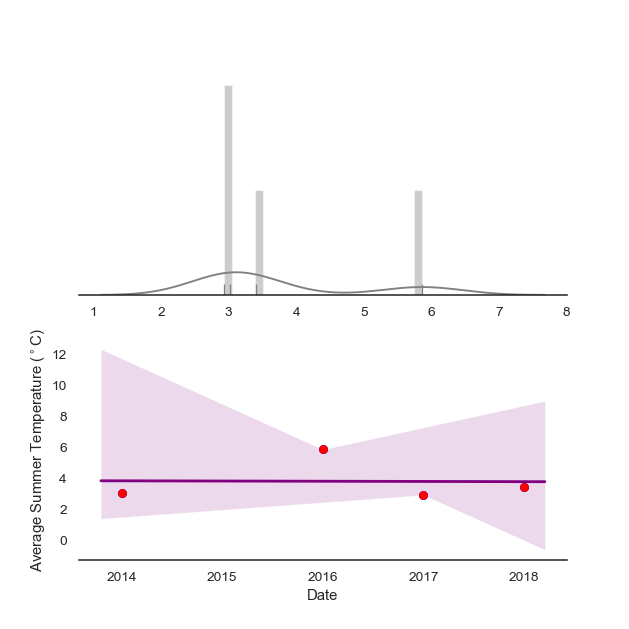

In [76]:
#Yay what an awesome plot! Boomza
plot_funcs.histogram_and_scatterlmplot(Glacier, Station, plotdata=yrdat_summer[[Glacier+Station]], ylabel='Average Summer Temperature ($^\circ$C)')
plt.savefig(save_dir + Glacier+Station +'Summer2019.jpg', dpi=300)

In [51]:
import plot_funcs
yrdat_summer['year']=yrdat_summer.index.year

C:\Users\ehbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<IPython.core.display.Javascript object>


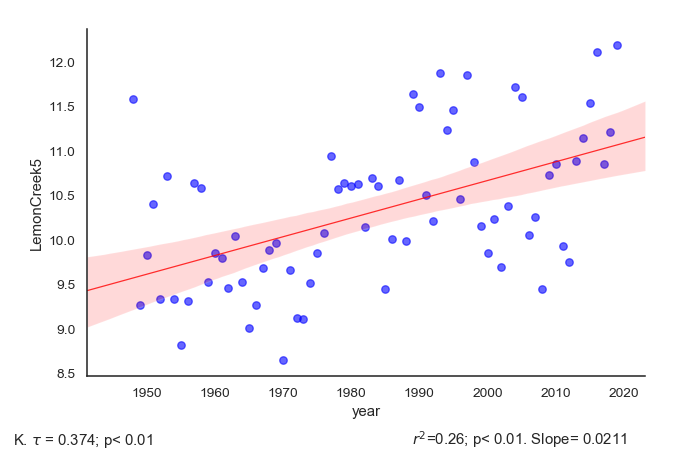

In [52]:
#statistical results
result=plot_funcs.OLS_plot('year', Glacier+Station, dat=yrdat_summer, title='' , aspect=1.5)

In [41]:
result

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,0.012888,0.029256,0.374022,0.000003,0.263267,0.000002,0.021072


<IPython.core.display.Javascript object>


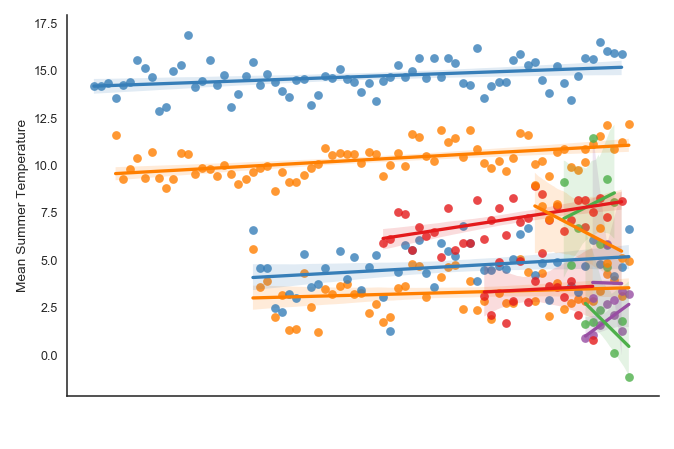

In [42]:
panel_b=sns.lmplot(x="Year", y="Temperature", hue="Glacier", data=yrdat_melt_summer, truncate=True,
            palette=sns.color_palette(glacier_pal), legend=False, aspect=1.5)
#plt.legend(loc='lower left')
plt.ylabel('Mean Summer Temperature')
panel_b.set_xticklabels([])
panel_b.set_axis_labels(x_var='')
plt.savefig(save_dir + 'MeanSummerTemperatureBLAH.jpg', dpi=600)

## START HERE TOMORROW 2/12 Emily
## Make Plot of Total Winter Precipitation

* not using under catch correction (for trend analysis purposes, as rec. by Bieniek)

In [43]:
#Read in new 'alldat' of precipitation (not temperature) data
alldat=pd.DataFrame()
    
for Glacier in ['SouthCascade'] +Glaciers: #Neccesary to put south cascade first due to long time record
        
    print('top level ' + Glacier)
    #Define 'main' site at each glacier
    if Glacier=='Gulkana':
        Stations=['1480', '1725']
    if Glacier=='Wolverine':
        Stations=['990', '1420']
    if Glacier=='LemonCreek':
        Stations=['1285', '5', 'Camp17AWS']
    if Glacier=='SouthCascade':
        Stations=['270', '1830']
    if Glacier=='Sperry':
        Stations=['1920', '2440']
    
    for Station in Stations:
        #Read in data

        data_dir=base_path +"Data/"+Glacier + r"/AllYears/Wx/LVL2/"

        fl=Glacier.lower()+Station+'_daily_LVL2.csv'
        if Station in ['990', '1480']:
            data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"
            fl='Input_' + Glacier + Station+ '_Daily_Weather.csv'
        if Glacier=='JuneauIcefield':
            data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
            fl=Glacier.lower() +Station + '_daily_LVL2.csv'
        pth=os.path.join(data_dir, fl)
        dat=pd.read_csv(pth)
        print("read data from "+ pth)

        select=['precip' in x for x in dat.columns.str.lower()]
        precip_col=dat.columns[select]
        if len(precip_col)<1:
            print('no precip column in ')
            print(dat.columns.values)
            continue
        print("Precip Column= " + precip_col.values[0])

        #Set time index
        dat.Date=pd.to_datetime(dat.Date, infer_datetime_format=True)
        dat=dat.set_index('Date')

        #Standardize the name of the precip column
        #dat.rename(columns={precip_col:'Precipitation'}, inplace=True)
        #Add month column
        dat['month']=dat.index.month
        dat['decimal_date']=dat.index.year + (dat.index.dayofyear-1)/365
        
        print(dat[precip_col.values[0]].first_valid_index())

        #Store Temperature as the glacier name
        alldat[Glacier+Station]=dat[precip_col.values[0]]

top level SouthCascade
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL2/southcascade270_daily_LVL2.csv
Precip Column= Precipitation
1945-01-01 00:00:00
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL2/southcascade1830_daily_LVL2.csv
no precip column in 
['Date' 'site_temp_min' 'site_temp_max' 'site_temp_WMO' 'site_temp_USGS'
 'RelHum' 'WindSpeed' 'RadiationIn' 'WindDir' 'VecAvgWindDir'
 'Tpassive1_USGS']
top level Gulkana
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL3/Input_Gulkana1480_Daily_Weather.csv
Precip Column= Precipitation
1967-06-01 00:00:00
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL2/gulkana1725_daily_LVL2.csv
Precip Column= TPG_Precip
2014-08-26 00:00:00
top level Wolverine
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Wolverine/AllYears/Wx/LVL3/Input_Wolverine990_Daily_We

In [44]:
alldat.to_csv(save_dir+'daily precipitation.csv', date_format='%Y/%m/%d %H:%M')

<IPython.core.display.Javascript object>


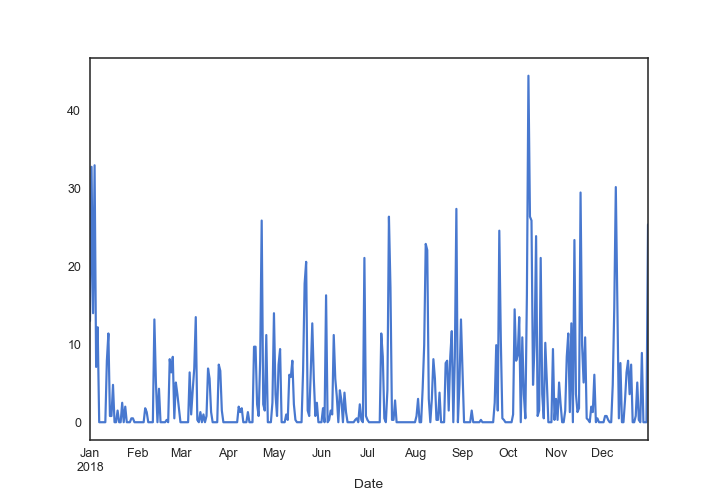

In [45]:
plt.figure()
alldat.LemonCreek5['2018'].plot()

In [46]:
save_dir

'C:/Users/ehbaker/Documents/Summer20192/'

In [47]:
season=season_list[1]
season_nam=season_names[1]
alldat['month']=alldat.index.month
season_dat=alldat[alldat.month.isin(season)].copy()

In [48]:
season_dat.head()

,SouthCascade270,Gulkana1480,Gulkana1725,Wolverine990,Wolverine1420,LemonCreek5,Sperry1920,month
Date,,,,,,,,
1945-01-01,6.4,NaN,NaN,NaN,NaN,NaN,NaN,1
1945-01-02,0.8,NaN,NaN,NaN,NaN,NaN,NaN,1
1945-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1945-01-04,0.5,NaN,NaN,NaN,NaN,NaN,NaN,1
1945-01-05,29.2,NaN,NaN,NaN,NaN,NaN,NaN,1


In [49]:
wint_precip_dat=pd.DataFrame()
for Glacier in ['SouthCascade'] +Glaciers:
    
    #Define 'main' site at each glacier
    if Glacier=='Gulkana':
        Stations=['1480', '1725']
    if Glacier=='Wolverine':
        Stations=['990', '1420']
    if Glacier=='LemonCreek':
        Stations=['1285', '5', 'Camp17AWS']
    if Glacier=='SouthCascade':
        Stations=['270', '1830']
    if Glacier=='Sperry':
        Stations=['1920', '2440']
    
    for Station in Stations:
        if not Glacier+Station in season_dat.columns:
            print("no precip data for "+ Glacier + Station)
            continue
        wint_precip_dat[Glacier +Station]=wx.aggregate_time_with_threshold(season_dat[Glacier+Station], 'AS',func='sum', steps_in_period=90, threshold=0.8)

no precip data for SouthCascade1830
no precip data for LemonCreek1285
no precip data for LemonCreekCamp17AWS
no precip data for SouthCascade1830
no precip data for Sperry2440


<IPython.core.display.Javascript object>


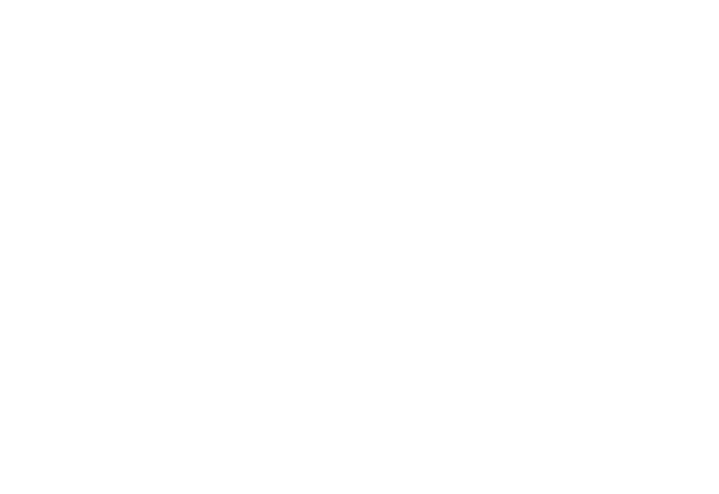

Date
1945-01-01       NaN
1946-01-01       NaN
1947-01-01       NaN
1948-01-01     616.8
1949-01-01     845.4
1950-01-01     338.4
1951-01-01     478.6
1952-01-01     837.0
1953-01-01     799.4
1954-01-01     638.8
1955-01-01     636.6
1956-01-01     995.5
1957-01-01     575.4
1958-01-01     743.2
1959-01-01     732.6
1960-01-01     815.0
1961-01-01     784.2
1962-01-01     826.3
1963-01-01     826.5
1964-01-01     851.7
1965-01-01     717.4
1966-01-01     754.4
1967-01-01     633.0
1968-01-01     616.8
1969-01-01     575.1
1970-01-01     515.5
1971-01-01     666.8
1972-01-01     661.2
1973-01-01     541.6
1974-01-01    1011.6
               ...  
1990-01-01     778.5
1991-01-01    1085.0
1992-01-01    1063.0
1993-01-01    1235.4
1994-01-01    1042.8
1995-01-01     540.2
1996-01-01     724.0
1997-01-01    1039.5
1998-01-01     697.4
1999-01-01    1058.4
2000-01-01     833.3
2001-01-01     789.2
2002-01-01     882.5
2003-01-01     692.9
2004-01-01    1102.4
2005-01-01    1154.9
2006-01-

In [50]:
plt.figure()
wint_precip_dat.LemonCreek5

In [51]:
wint_precip_dat.to_csv(save_dir+ 'total winter precipitation.csv', float_format='%.1f', date_format='%Y')


In [56]:
imp.reload(plot_funcs)

<module 'plot_funcs' from 'C:\\Users\\ehbaker\\Documents\\Python\\Modules\\plot_funcs.py'>

In [57]:
import plot_funcs
Glacier='Wolverine'
Station='990'
#Yay what an awesome plot! Boomza
plot_funcs.histogram_and_scatterlmplot(Glacier, Station, plotdata=wint_precip_dat[[Glacier+Station]])
plt.savefig(save_dir + Glacier+Station +'Winter2019.jpg', dpi=300)

NameError: name 'wint_precip_dat' is not defined

In [53]:
wint_precip_dat_melt=pd.melt(wint_precip_dat.reset_index(), value_name=precip_var, var_name='Glacier', id_vars='Date')
wint_precip_dat_melt.set_index('Date', inplace=True)
wint_precip_dat_melt['Year']=wint_precip_dat_melt.index.year

In [54]:
wint_precip_dat_melt['Precipitation']=wint_precip_dat_melt.Precipitation/1000

In [55]:
wint_precip_dat_melt.Glacier.unique()

array(['SouthCascade270', 'Gulkana1480', 'Gulkana1725', 'Wolverine990',
       'Wolverine1420', 'LemonCreek5', 'Sperry1920'], dtype=object)

<IPython.core.display.Javascript object>


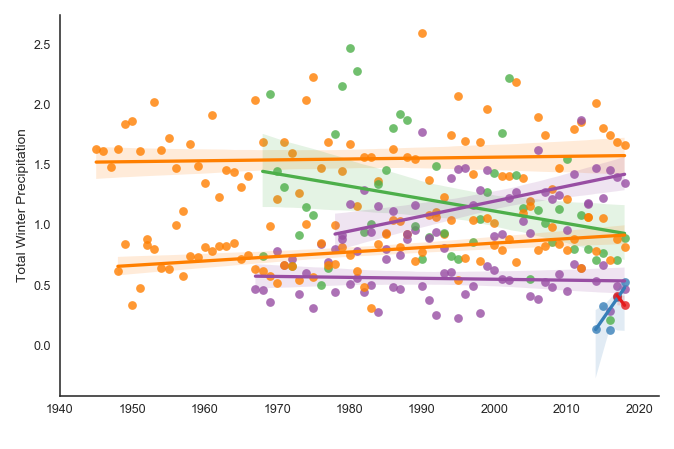

C:/Users/ehbaker/Documents/Summer20192/


In [56]:
panel_c=sns.lmplot(x="Year", y=precip_var, hue="Glacier", data=wint_precip_dat_melt, truncate=True,
            palette=sns.color_palette(glacier_pal), legend=False, aspect=1.5, legend_out=True)
#plt.legend(loc='upper right')
plt.ylabel('Total Winter Precipitation')
panel_c.set_axis_labels(x_var='')
xticklabs=['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
panel_c.set(xticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.savefig(save_dir + 'TotalWinterPrecipBLAH2.jpg')
print(save_dir)